In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

Securities chosen using Joel Greenblatt's Magic Formula, data queried through [Screener](https://www.screener.in/)
  
<br/>

Query:

Average return on capital employed 5Years > 29% AND  
Average Earnings 5Year > 5.5 % AND  
Market Capitalization > 50000 AND  
Return on equity > 24%

# Initialization

In [138]:
CAPITAL = 10000

TICKERS = [
    'TCS.NS',
    'ITC.NS', 
    'INFY.NS', 
    'LICI.NS', 
    'MARICO.NS', 
    'IRCTC.NS', 
    'LTIM.NS', 
    'COALINDIA.NS'
    ]

# TICKERS = [
#     'BAYERCROP.NS',
#     'ISEC.NS', 
#     'GLAXO.NS', S
#     'COFORGE.NS', 
#     'COROMANDEL.NS', 
#     'MANYAVAR.NS', 
#     ]

In [139]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [140]:
stocks_prices = pd.DataFrame({'A' : []})
stocks_info = pd.DataFrame({'A' : []})

for i, ticker in enumerate(TICKERS):
    print(i, ticker)
    yticker = yf.Ticker(ticker)

    history_prices = yticker.history(period='max')

    history_prices['Ticker'] = ticker
    history_prices['Year'] = history_prices.index.year
    history_prices['Month'] = history_prices.index.month
    history_prices['Weekday'] = history_prices.index.weekday
    history_prices['Date'] = history_prices.index.date

    for i in [1,3,7,30,90,365]:
        history_prices['growth_'+str(i)+'d'] = history_prices['Close'] / history_prices['Close'].shift(i)

    history_prices['future_growth_3d'] = history_prices['Close'].shift(-3) / history_prices['Close']

    history_prices['volatility'] = history_prices['Close'].rolling(30).std() * np.sqrt(252)

    if stocks_prices.empty:
        stocks_prices = history_prices
    else: 
        stocks_prices = pd.concat([stocks_prices,history_prices], ignore_index=True)
     

0 TCS.NS
1 ITC.NS
2 INFY.NS
3 LICI.NS
4 MARICO.NS
5 IRCTC.NS
6 LTIM.NS
7 COALINDIA.NS


In [141]:
filter_last_date = stocks_prices.Date==stocks_prices.Date.max()

stocks_prices.Date.max()

datetime.date(2023, 7, 31)

In [142]:
stocks_prices[filter_last_date]

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Year,Month,Weekday,Date,growth_1d,growth_3d,growth_7d,growth_30d,growth_90d,growth_365d,future_growth_3d,volatility
5208,3364.399902,3426.649902,3360.899902,3421.449951,2743566,0.0,0.0,TCS.NS,2023,7,0,2023-07-31,1.019685,1.009784,0.987916,1.080458,1.086987,0.953183,NaN,1570.985524
12140,469.000000,469.700012,463.500000,465.700012,8183581,0.0,0.0,ITC.NS,2023,7,0,2023-07-31,0.994130,0.986130,0.946256,1.027808,1.247688,2.155154,NaN,206.006293
19076,1348.750000,1357.500000,1333.250000,1355.699951,7901215,0.0,0.0,INFY.NS,2023,7,0,2023-07-31,1.011339,1.005078,0.935288,1.049588,0.980084,0.828353,NaN,885.762738
19377,627.000000,641.400024,627.000000,639.950012,1469096,0.0,0.0,LICI.NS,2023,7,0,2023-07-31,1.021061,1.019110,1.023511,1.068980,1.114236,NaN,NaN,132.147014
26226,574.950012,577.000000,557.200012,560.549988,3135574,0.0,0.0,MARICO.NS,2023,7,0,2023-07-31,0.975973,1.052281,1.039692,1.022621,1.153158,1.118290,NaN,176.704646
27170,632.500000,642.650024,631.049988,640.650024,2234336,0.0,0.0,IRCTC.NS,2023,7,0,2023-07-31,1.015857,1.033306,1.024794,0.963383,1.047413,0.772233,NaN,212.601387
28907,4840.399902,4904.000000,4801.000000,4891.649902,343016,0.0,0.0,LTIM.NS,2023,7,0,2023-07-31,1.009827,1.006398,0.981264,0.983956,1.054827,0.815742,NaN,1847.344005
32048,228.500000,229.949997,227.000000,229.250000,19420876,0.0,0.0,COALINDIA.NS,2023,7,0,2023-07-31,1.009467,0.994577,0.997824,1.003063,1.034288,1.633653,NaN,45.138031


In [143]:
df_pivot = stocks_prices.pivot('Date','Ticker','Close').reset_index()
df_pivot

Ticker,Date,COALINDIA.NS,INFY.NS,IRCTC.NS,ITC.NS,LICI.NS,LTIM.NS,MARICO.NS,TCS.NS
0,1996-01-01,NaN,0.519068,NaN,3.303553,NaN,NaN,NaN,NaN
1,1996-01-02,NaN,0.516969,NaN,3.178642,NaN,NaN,NaN,NaN
2,1996-01-03,NaN,0.520468,NaN,3.076741,NaN,NaN,NaN,NaN
3,1996-01-04,NaN,0.517032,NaN,3.134594,NaN,NaN,NaN,NaN
4,1996-01-05,NaN,0.510924,NaN,3.078056,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6931,2023-07-25,229.949997,1334.599976,619.450012,462.299988,623.049988,4868.649902,540.599976,3399.149902
6932,2023-07-26,230.500000,1348.849976,620.000000,472.250000,627.950012,4860.549805,532.700012,3388.300049
6933,2023-07-27,229.050003,1353.150024,619.500000,465.049988,630.250000,4862.450195,554.049988,3396.899902
6934,2023-07-28,227.100006,1340.500000,630.650024,468.450012,626.750000,4844.049805,574.349976,3355.399902


In [144]:
# calculating the correlation matrix

df_pivot.corr()

Ticker,COALINDIA.NS,INFY.NS,IRCTC.NS,ITC.NS,LICI.NS,LTIM.NS,MARICO.NS,TCS.NS
Ticker,,,,,,,,
COALINDIA.NS,1.000000,0.094375,0.630349,0.603332,-0.660687,0.079398,0.194094,0.100370
INFY.NS,0.094375,1.000000,0.872890,0.816594,0.381546,0.979006,0.949588,0.979459
IRCTC.NS,0.630349,0.872890,1.000000,0.534224,0.156065,0.909440,0.866668,0.850747
ITC.NS,0.603332,0.816594,0.534224,1.000000,-0.669534,0.388113,0.903239,0.838554
LICI.NS,-0.660687,0.381546,0.156065,-0.669534,1.000000,-0.523614,0.095401,-0.040368
LTIM.NS,0.079398,0.979006,0.909440,0.388113,-0.523614,1.000000,0.934833,0.963218
MARICO.NS,0.194094,0.949588,0.866668,0.903239,0.095401,0.934833,1.000000,0.974004
TCS.NS,0.100370,0.979459,0.850747,0.838554,-0.040368,0.963218,0.974004,1.000000


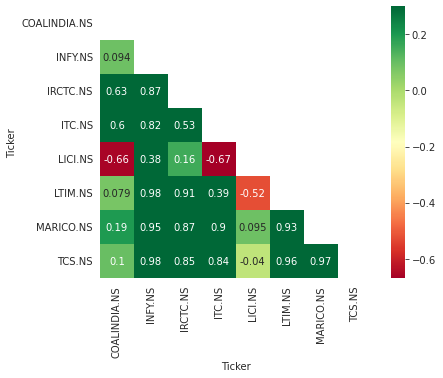

In [145]:
corr = df_pivot.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True, cmap='RdYlGn')

# Testing types of optimal portfolios

In [146]:
import pypfopt

In [147]:
from pypfopt import risk_models
from pypfopt import plotting
from pypfopt import expected_returns
from pypfopt import EfficientFrontier

Expected returns for each stock: Ticker
COALINDIA.NS    0.130081
INFY.NS         0.319679
IRCTC.NS        0.228308
ITC.NS          0.240826
LICI.NS         0.100753
LTIM.NS         0.178922
MARICO.NS       0.216481
TCS.NS          0.508499
Name: mkt, dtype: float64 

Portfolio weights or min colatility optimization (lowest level of risk): {
    "COALINDIA.NS": 0.14797,
    "INFY.NS": 0.04286,
    "IRCTC.NS": 0.18187,
    "ITC.NS": 0.06757,
    "LICI.NS": 0.28198,
    "LTIM.NS": 0.16919,
    "MARICO.NS": 0.07686,
    "TCS.NS": 0.0317
} 

Expected annual return: 18.2%
Annual volatility: 10.2%
Sharpe Ratio: 1.08
Portfolio performance: (0.18218464167084863, 0.1019217227046705, 1.0848976914494561) 

Portfolio weights for maxSharpe optimization (highest return-per-risk): {
    "COALINDIA.NS": 0.14797,
    "INFY.NS": 0.04286,
    "IRCTC.NS": 0.18187,
    "ITC.NS": 0.06757,
    "LICI.NS": 0.28198,
    "LTIM.NS": 0.16919,
    "MARICO.NS": 0.07686,
    "TCS.NS": 0.0317
} 

Expected annual return

c:\Users\tahze\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


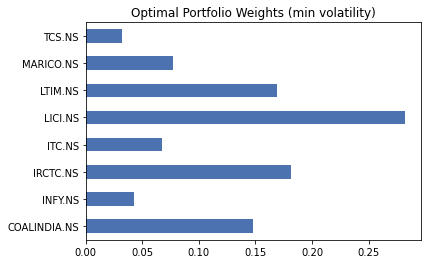

In [148]:
import json

mu = expected_returns.capm_return(df_pivot.set_index('Date'))

# EMA Historical Return: expected_returns.ema_historical_return(df_pivot.set_index('Date'))
# Mean Historical Return: expected_returns.mean_historical_return(df_pivot.set_index('Date'))

print(f'Expected returns for each stock: {mu} \n')

S = risk_models.CovarianceShrinkage(df_pivot.set_index('Date')).ledoit_wolf()

ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef.min_volatility()
weights_min_volatility = ef.clean_weights()

print(f'Portfolio weights or min colatility optimization (lowest level of risk): {json.dumps(weights_min_volatility, indent=4, sort_keys=True)} \n')
print(f'Portfolio performance: {ef.portfolio_performance(verbose=True, risk_free_rate=0.07161)} \n')
# Risk-free rate : 10Y Indian bond rate as on 31-July-2021 is 7.161%

pd.Series(weights_min_volatility).plot.barh(title = 'Optimal Portfolio Weights (min volatility)')

ef2 = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ef2.max_sharpe()
weights_max_sharpe = ef.clean_weights()

print(f'Portfolio weights for maxSharpe optimization (highest return-per-risk): {json.dumps(weights_max_sharpe, indent=4, sort_keys=True)} \n')
print(f'Portfolio performance: {ef2.portfolio_performance(verbose=True, risk_free_rate=0.07161)} \n')

In [149]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 24.1%
Annual volatility: 11.9%
Sharpe Ratio: 1.86


In [150]:
returns = expected_returns.returns_from_prices(df_pivot.set_index('Date')).dropna()
returns.head()

Ticker,COALINDIA.NS,INFY.NS,IRCTC.NS,ITC.NS,LICI.NS,LTIM.NS,MARICO.NS,TCS.NS
Date,,,,,,,,
2022-05-18,0.005419,-0.006092,-0.016687,0.007933,0.001257,-0.015846,0.041149,-0.000811
2022-05-19,-0.023444,-0.054366,-0.025158,0.033171,-0.040509,-0.052717,-0.025298,-0.054178
2022-05-20,0.026214,0.019620,0.011300,0.015781,-0.017482,0.012939,0.035357,0.009519
2022-05-23,-0.008873,0.009106,-0.013590,-0.019643,-0.011257,0.025634,0.005865,0.008731
2022-05-24,-0.010581,-0.018660,-0.003215,-0.013297,0.007651,-0.033035,-0.005549,-0.010160


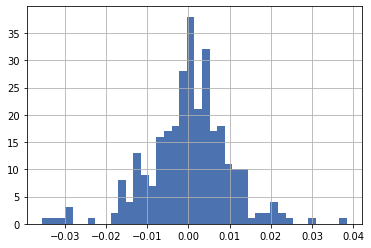

In [151]:
# computing CVaR

portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=40);

In [152]:
# VaR

var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -1.53%
CVaR: -2.28%


In [153]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True)

Expected annual return: 29.5%
Conditional Value at Risk: 1.53%


(0.2945677260302866, 0.01530283209786677)

# Efficient Frontier

In [154]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True, risk_free_rate=0.07161)

Expected annual return: 23.5%
Annual volatility: 11.6%
Sharpe Ratio: 1.41


(0.23456743269655678, 0.11564975800661538, 1.4090598675289516)

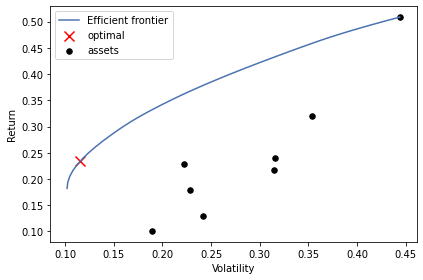

In [155]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [156]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.27266792 0.23733175 0.20977239 ... 0.18296832 0.28848107 0.27259679]
Sample portfolio volatilities: 0       0.162072
1       0.177599
2       0.122765
3       0.146777
4       0.131300
          ...   
9995    0.187399
9996    0.219442
9997    0.114098
9998    0.175903
9999    0.152980
Length: 10000, dtype: float64


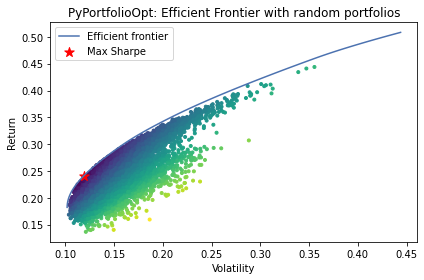

In [157]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

# Format
ax.set_title("PyPortfolioOpt: Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

# Discrete Capital Allocation

In [158]:
df_pivot.set_index('Date').iloc[-1]

Ticker
COALINDIA.NS     229.250000
INFY.NS         1355.699951
IRCTC.NS         640.650024
ITC.NS           465.700012
LICI.NS          639.950012
LTIM.NS         4891.649902
MARICO.NS        560.549988
TCS.NS          3421.449951
Name: 2023-07-31, dtype: float64

In [159]:
print(f'Portfolio weights for max Sharpe optimisation (highest return-per-risk): {json.dumps(weights_max_sharpe, indent=4, sort_keys=True)} \n')

Portfolio weights for max Sharpe optimisation (highest return-per-risk): {
    "COALINDIA.NS": 0.14797,
    "INFY.NS": 0.04286,
    "IRCTC.NS": 0.18187,
    "ITC.NS": 0.06757,
    "LICI.NS": 0.28198,
    "LTIM.NS": 0.16919,
    "MARICO.NS": 0.07686,
    "TCS.NS": 0.0317
} 



In [160]:
df_last_day = stocks_prices[filter_last_date]
df_last_day['max_sharpe_weight']= df_last_day['Ticker'].apply(lambda x:weights_max_sharpe[x])

C:\Users\tahze\AppData\Local\Temp\ipykernel_22872\144812679.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_day['max_sharpe_weight']= df_last_day['Ticker'].apply(lambda x:weights_max_sharpe[x])


In [161]:
df_last_day['stock_investment_amount'] = CAPITAL*df_last_day['max_sharpe_weight'] /df_last_day['Close']

C:\Users\tahze\AppData\Local\Temp\ipykernel_22872\2567886643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_day['stock_investment_amount'] = CAPITAL*df_last_day['max_sharpe_weight'] /df_last_day['Close']


In [162]:
df_last_day[['Close','Ticker','Date','max_sharpe_weight','stock_investment_amount']]

,Close,Ticker,Date,max_sharpe_weight,stock_investment_amount
5208,3421.449951,TCS.NS,2023-07-31,0.03170,0.092651
12140,465.700012,ITC.NS,2023-07-31,0.06757,1.450934
19076,1355.699951,INFY.NS,2023-07-31,0.04286,0.316147
19377,639.950012,LICI.NS,2023-07-31,0.28198,4.406282
26226,560.549988,MARICO.NS,2023-07-31,0.07686,1.371153
27170,640.650024,IRCTC.NS,2023-07-31,0.18187,2.838835
28907,4891.649902,LTIM.NS,2023-07-31,0.16919,0.345875
32048,229.250000,COALINDIA.NS,2023-07-31,0.14797,6.454526


In [163]:
from pypfopt import DiscreteAllocation

latest_prices = df_pivot.set_index('Date').iloc[-1]
disc_allocation = DiscreteAllocation(weights_max_sharpe, latest_prices, total_portfolio_value = CAPITAL, short_ratio=0.0)
alloc, leftover = disc_allocation.lp_portfolio()
print(f"Discrete allocation for the initial investment Rs. {CAPITAL} performed with Rs. {leftover:.2f} leftover")
alloc

Discrete allocation for the initial investment Rs. 10000 performed with Rs. 94.60 leftover


{'COALINDIA.NS': 6,
 'INFY.NS': 1,
 'IRCTC.NS': 3,
 'ITC.NS': 2,
 'LICI.NS': 5,
 'MARICO.NS': 2}